In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
np.random.seed(42)

In [20]:
# Generamos una serie temporal
# Parámetros
dias = pd.date_range(start="2024-01-01", periods=365, freq="D")
a0 = 80  # Componente constante
a1 = 60 * np.cos(2 * np.pi * np.arange(365) / 365)  # Componente de tendencia, amplitud 60 (vertical), 1 ciclo
a2 = 15 * np.sin(2 * np.pi * np.arange(365) * 14 / 365)  # Componente estacional, amplitud 15 (vertical), 14 ciclos
ruido = np.random.normal(0, 12, len(dias))  # Ruido aleatorio, std error 12

# Serie combinada
serie_temporal = pd.Series(a0 + a1 + a2 + ruido, index=dias)

# Filtros
ma7 = serie_temporal.rolling(window=7, center=True).mean()

residual_ma7 = serie_temporal - ma7

ma21 = serie_temporal.rolling(window=21, center=True).mean()

residual_ma21 = serie_temporal - ma21

residual_ma21_ma7 = ma7 - ma21

## Serie Original y MA7:
Serie suavizada, destacando patrones a largo plazo (semanales). **Elimina el ruido "intrasemanal", del día a día**.

## Residual de MA7
La señal después de eliminar las tendencias, **permitiendo ver así las fluctuaciones diarias**.

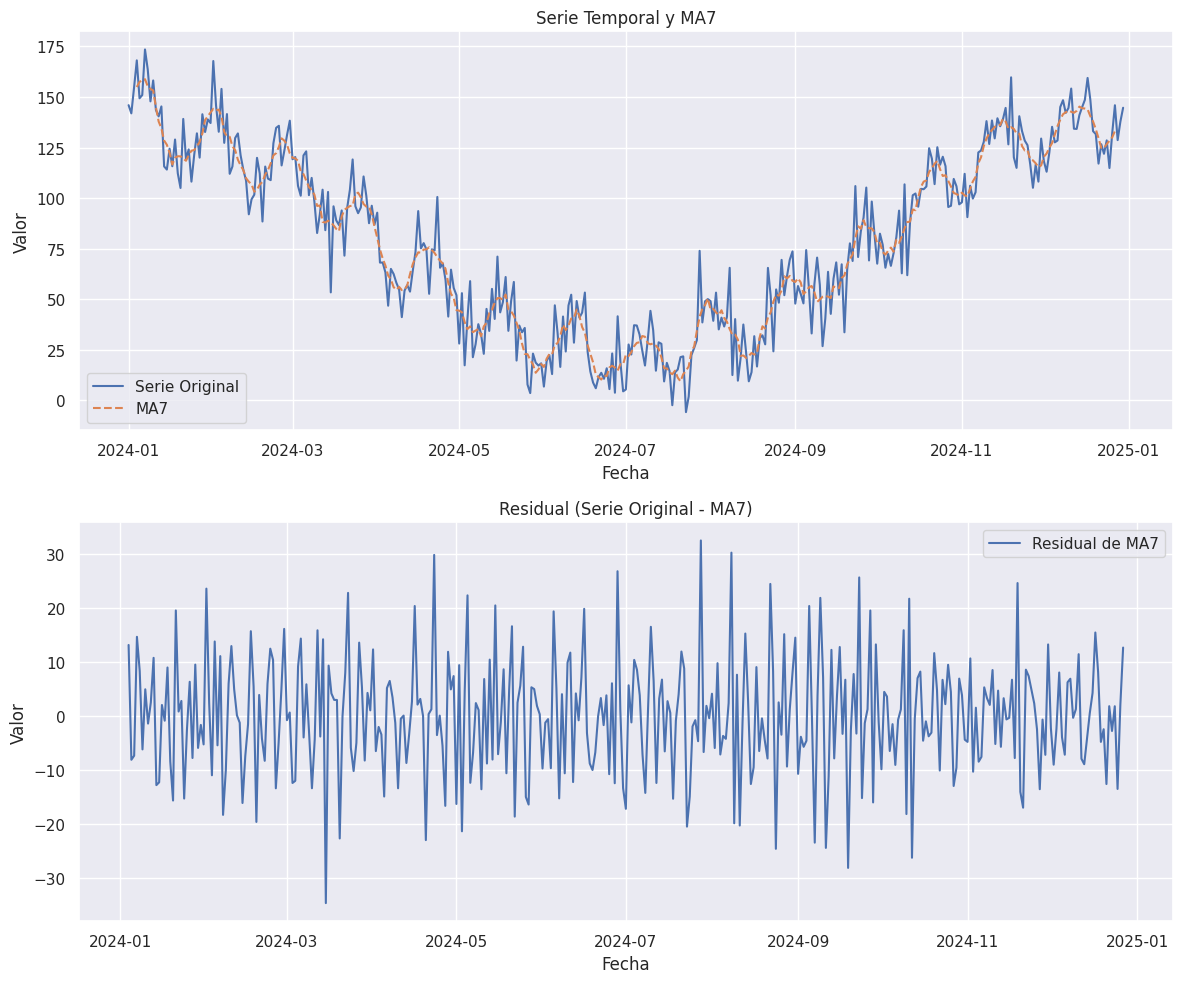

In [21]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Serie Original y MA7
sns.lineplot(x=dias, y=serie_temporal, label='Serie Original', ax=axes[0])
sns.lineplot(x=dias, y=ma7, label='MA7', linestyle='--', ax=axes[0])
axes[0].set_title('Serie Temporal y MA7')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Valor')
axes[0].legend()

# Residual de MA7
sns.lineplot(x=dias, y=residual_ma7, label='Residual de MA7', ax=axes[1])
axes[1].set_title('Residual (Serie Original - MA7)')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Valor')
axes[1].legend()

plt.tight_layout()
plt.show()

## Serie original y MA21:
El MA21 muestra la seasonality anual (1 ciclo) y **ruido de baja frecuencia**, y filtró ruido de alta frecuencia y lo mensual.


## Residual de MA21 y MA7:
Detecta cambios intermedios (mensuales aprox) en la tendencia y es más sensible a cambios de fase en las estacionalidades. Tiene un poco de ruido.


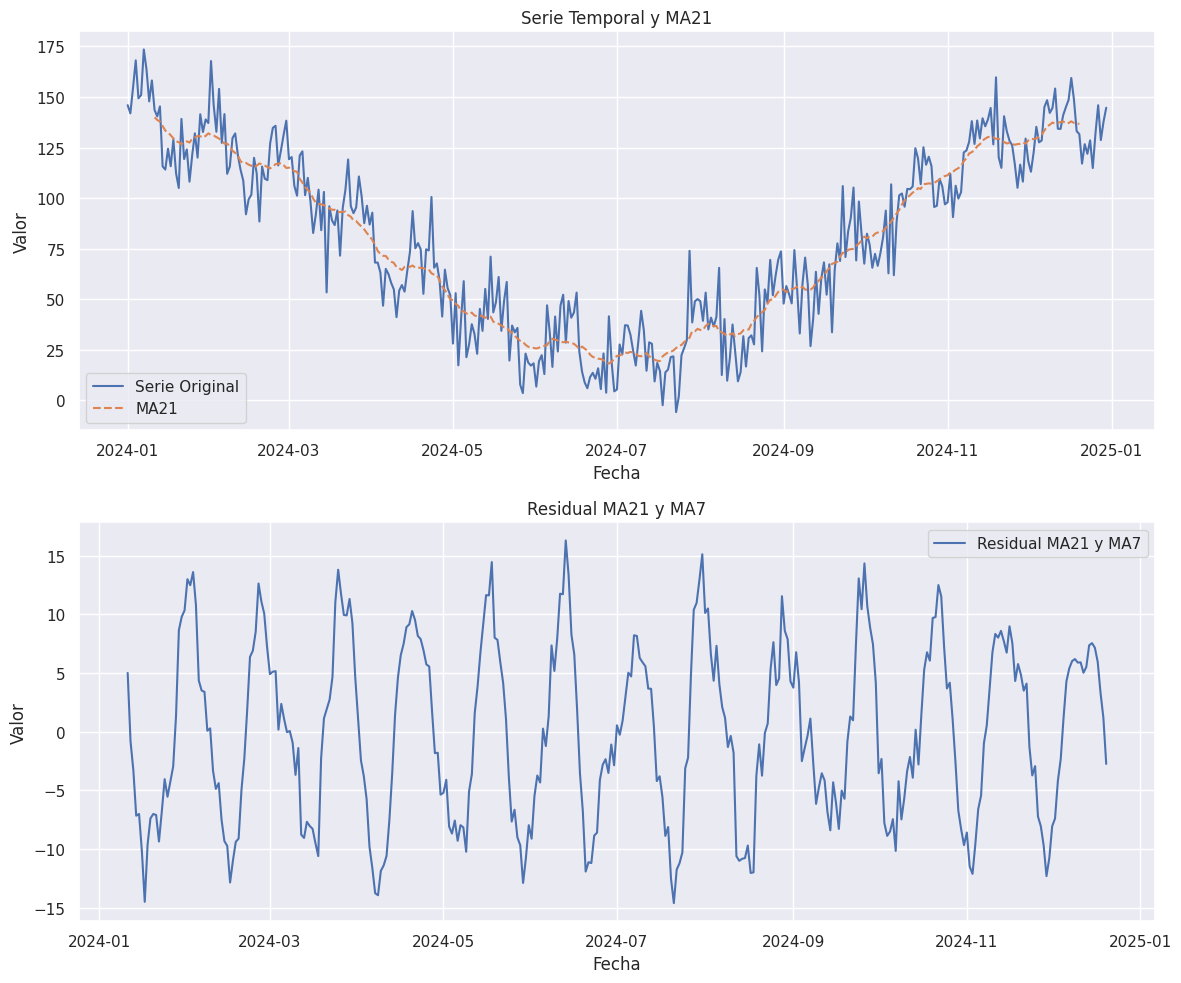

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Serie Original
sns.lineplot(x=dias, y=serie_temporal, label='Serie Original', ax=axes[0])
sns.lineplot(x=dias, y=ma21, label='MA21', linestyle='--', ax=axes[0])
axes[0].set_title('Serie Temporal y MA21')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Valor')
axes[0].legend()

# Residual de MA21-MA7
sns.lineplot(x=dias, y=residual_ma21_ma7, label='Residual MA21 y MA7', ax=axes[1])
axes[1].set_title('Residual MA21 y MA7')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Valor')
axes[1].legend()

plt.tight_layout()
plt.show()

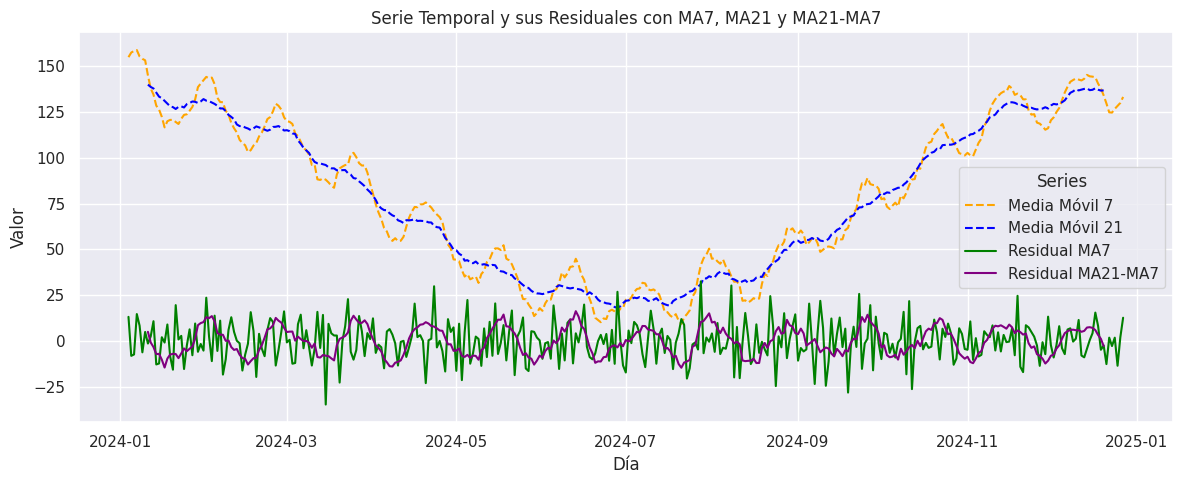

In [23]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5))

sns.lineplot(x=dias, y=ma7, label="Media Móvil 7", linestyle='--', color='orange', ax=axes)
sns.lineplot(x=dias, y=ma21, label="Media Móvil 21", linestyle='--', color='blue', ax=axes)
sns.lineplot(x=dias, y=residual_ma7, label="Residual MA7", color='green', ax=axes)
sns.lineplot(x=dias, y=residual_ma21_ma7, label="Residual MA21-MA7", color='purple', ax=axes)

axes.set_title("Serie Temporal y sus Residuales con MA7, MA21 y MA21-MA7")
axes.set_xlabel("Día")
axes.set_ylabel("Valor")
axes.legend(title="Series")

plt.tight_layout()
plt.show()

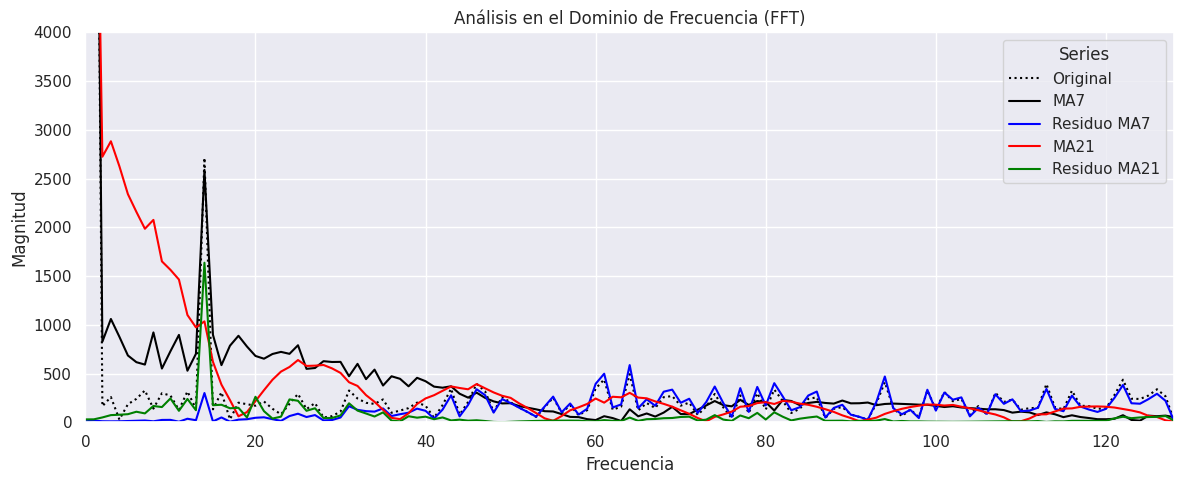

In [24]:
def safe_fft(data):
    return np.abs(np.fft.fft(np.nan_to_num(data, nan=0.0)))

# FFT
fft_a = safe_fft(serie_temporal)
fft_outMA7 = safe_fft(ma7)
fft_difMA7 = safe_fft(residual_ma7)
fft_outMA21 = safe_fft(ma21)
fft_difMA21_MA7 = safe_fft(residual_ma21_ma7)

fig, axes = plt.subplots(1, 1, figsize=(12, 5))

axes.plot(fft_a, label='Original', linestyle=':', color='black')
axes.plot(fft_outMA7, label='MA7', color='black')
axes.plot(fft_difMA7, label='Residuo MA7', color='blue')
axes.plot(fft_outMA21, label='MA21', color='red')
axes.plot(fft_difMA21_MA7, label='Residuo MA21', color='green')

axes.set_title("Análisis en el Dominio de Frecuencia (FFT)")
axes.set_xlabel("Frecuencia")
axes.set_ylabel("Magnitud")
axes.set_xlim(0, 128)
axes.set_ylim(0, 4000)
axes.legend(title="Series")

plt.tight_layout()
plt.show()